In [20]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import axes3d
from tensorflow import nn ## de goi cac active function
from sklearn import tree
from mpl_toolkits.mplot3d import axes3d
from keras.models import Sequential,Model
from keras.layers import Input,Activation, Dropout, Flatten, Dense
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from collections import namedtuple
import matplotlib
from keras.callbacks import TensorBoard
import tensorboardX
from keras.models import load_model
from IPython.display import clear_output
from keras.preprocessing import image
from keras.utils import np_utils ## dung de categorical cac label
from sklearn.model_selection import train_test_split  ## dung de tach bo test ra
from sklearn.datasets import load_iris
import time
import datetime
from math import pow
import random
from keras.callbacks import ReduceLROnPlateau
from collections import deque
import csv
from keras.layers import PReLU
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping
import sys
import os
import pickle
from keras.layers.normalization import BatchNormalization
import h5py
from tqdm import tqdm
from keras_radam import RAdam
from sklearn import preprocessing
from IPython.display import clear_output
from keras.utils import  to_categorical
from keras.callbacks import ModelCheckpoint
from itertools import count
from PIL import Image
import PIL
import math
from keras.callbacks import History 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
from tensorflow.compat.v1.keras.optimizers import Adam
import glob
from keras.layers import LeakyReLU
from mpi_adam import MpiAdam
import tf_util as U
from agent import Agent

In [21]:
pcn=[]
def get_map():
    pcn=[]
#     for i in range(30):
#         if (i==0 or i==5 or i==6 or i==11 or i==12 or i==17 or i==18 or i == 23 or i== 24 or i==29 or i == 30):
#               pcn.append([0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0])
#         elif (i==2 or i==8 or i==14 or i == 20 or i==26 ) :
#               pcn.append([1,0.9,0.95,0.9,0.9,1,1,0.9,0.95,0.9,0.9,1,1,0.9,0.95,0.9,0.9,1,1,0.9,0.95,0.9,0.9,1,1,0.9,0.95,0.9,0.9,1])
#         else : 
#               pcn.append([1,0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9,0.9,1,1,0.9,0.9,0.9,0.9,1])
#     pcn = np.asarray(pcn)
# 36x36 official
    for i in range(35):
        if (i==0 or i==4 or i==5 or i==9 or i==10 or i==14 or i==15 or i==19 or i==20 or i==24 or i==25 or i==29 or i==30 or i==34 or i==35):
            pcn.append([0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0])
        elif (i==2 or i==7 or i==12 or i==17 or i==22 or i==27 or i==32) :
            pcn.append([1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1])
        else : 
            pcn.append([1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1])
    pcn = np.asarray(pcn)
    return pcn
#8x8 official
#     for i in range(15):
#         if (i==0 or i==4 or i==5 or i==9 or i==10 or i==14 or i==15):
#             pcn.append([0,1,1,1,0,0,1,1,1,0,0,1,1,1,0])
#         elif (i==2 or i==7 or i==12) :
#             pcn.append([1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1])
#         else : 
#             pcn.append([1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1])
#     pcn = np.asarray(pcn)
#     return pcn
# for i in range(35):
#     if (i==0 or i==4 or i==5 or i==9 or i==10 or i==14 or i==15 or i==19 or i==20 or i==24 or i==25 or i==29 or i==30 or i==34 or i==35):
#         pcn.append([0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,0])
#     elif (i==2 or i==7 or i==12 or i==17 or i==22 or i==27 or i==32) :
#         pcn.append([1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1,1,0.9,0.95,0.9,1])
#     else : 
#         pcn.append([1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1,1,0.9,0.9,0.9,1])
pcn = get_map()
pcn = pcn.astype(float)
pcn.shape

(35, 35)

In [22]:
visited_mark = 0.8  # Cells visited by the agent will be painted by gray 0.8
agent_mark = 0.5      # The current agent cell will be painteg by gray 0.5
target_mark = 0.7
LEFT1 = 0
LEFT2 = 1
LEFT3 = 2
UP1 = 3
UP2 = 4
UP3 = 5
RIGHT1 = 6
RIGHT2 = 7
RIGHT3 = 8
DOWN1 = 9
DOWN2 = 10
DOWN3 = 11

# Actions dictionary
actions_dict = {
    LEFT1: 'left1',
    LEFT2: 'left2',
    LEFT3: 'left3',
    UP1:'up1',
    UP2:'up2',
    UP3:'up3',
    RIGHT1: 'right1',
    RIGHT2: 'right2',
    RIGHT3: 'right3',
    DOWN1: 'down1',
    DOWN2: 'down2',
    DOWN3: 'down3',
}
state_centroid_dict = {}
num_actions = len(actions_dict)
MODEL_NAME = "model"
# Exploagention factor
AGGREGATE_STATS_EVERY = 5

In [23]:
os.chdir("D:/Research/RL/RLAChips-V11/data")
source_data = glob.glob("*.xlsx")
os.getcwd()
import sys

In [24]:
df = {}
pc={}
for file in source_data :
  data = pd.read_excel(file,header=0)
  print(data)
  row = data.loc[data['Lamda']==1.5500].values[0][1:]
  file_name = file.split('.')[0]
  output_loss = row[0]
  power_cons = row[3]
  #print(output_loss)
  df[file_name] = np.log10(output_loss*4/3)
  pc[file_name] = power_cons
df


   Lamda    Output         Loss1     Loss2     pc
0  1.525  0.081787  3.120494e-05  0.000153  192.5
1  1.530  0.148833  3.441380e-05  0.000243  192.5
2  1.535  0.274497  4.577745e-05  0.001259  192.5
3  1.540  0.481452  3.673484e-05  0.002275  192.5
4  1.545  0.644609  9.567780e-06  0.002368  192.5
5  1.550  0.651973  4.227260e-06  0.002534  192.5
6  1.555  0.501727  1.284361e-06  0.002775  192.5
7  1.560  0.292534  3.142490e-07  0.001900  192.5
8  1.565  0.136158  1.971773e-06  0.000478  192.5
   Lamda    Output     Loss1     Loss2      pc
0  1.525  0.059389  0.000091  0.000750  184.15
1  1.530  0.118085  0.000042  0.001807  184.15
2  1.535  0.227252  0.000081  0.001311  184.15
3  1.540  0.436841  0.000184  0.000703  184.15
4  1.545  0.618331  0.000121  0.000174  184.15
5  1.550  0.637778  0.000104  0.000162  184.15
6  1.555  0.493877  0.000050  0.000634  184.15
7  1.560  0.291929  0.000028  0.000859  184.15
8  1.565  0.126916  0.000021  0.000950  184.15
   Lamda    Output     Loss1  

   Lamda    Output     Loss1     Loss2      pc
0  1.525  0.232075  0.000985  0.001124  128.65
1  1.530  0.329094  0.000359  0.000491  128.65
2  1.535  0.455145  0.001246  0.000226  128.65
3  1.540  0.573287  0.000906  0.000101  128.65
4  1.545  0.668551  0.000627  0.000019  128.65
5  1.550  0.715649  0.000436  0.000005  128.65
6  1.555  0.691557  0.000360  0.000001  128.65
7  1.560  0.590700  0.000789  0.000003  128.65
8  1.565  0.447518  0.001251  0.000009  128.65
   Lamda    Output     Loss1     Loss2      pc
0  1.525  0.232075  0.000259  0.000541  202.25
1  1.530  0.329094  0.000131  0.000174  202.25
2  1.535  0.455145  0.000178  0.000624  202.25
3  1.540  0.573287  0.000097  0.000617  202.25
4  1.545  0.668551  0.000018  0.000282  202.25
5  1.550  0.715649  0.000004  0.000090  202.25
6  1.555  0.691557  0.000005  0.000036  202.25
7  1.560  0.590700  0.000004  0.000222  202.25
8  1.565  0.447518  0.000010  0.000945  202.25
   Lamda    Output     Loss1     Loss2     pc
0  1.525  0.17

{'I1_to_J1': -0.060831490630537596,
 'I1_to_J2': -0.07039157926195691,
 'I1_to_J3': -0.06100618220166166,
 'I1_to_K1': -0.024081738085422133,
 'I1_to_K2': -0.03364182671684155,
 'I1_to_K3': -0.024063378362385385,
 'I1_to_O1': -0.02425642965654643,
 'I1_to_O2': -0.033623466993804786,
 'I1_to_O3': -0.02404501863934866,
 'I2_to_J1': -0.06981675080087654,
 'I2_to_J2': -0.08777659117674864,
 'I2_to_J3': -0.11315846891863693,
 'I2_to_K1': -0.024792541608285847,
 'I2_to_K2': -0.042752381984157935,
 'I2_to_K3': -0.03304863853272445,
 'I2_to_O1': -0.03304863853272445,
 'I2_to_O2': -0.05100847890859658,
 'I2_to_O3': -0.041304735457163115,
 'I3_to_J1': -0.05712925782497559,
 'I3_to_J2': -0.0594432556682023,
 'I3_to_J3': -0.057451647401003184,
 'I3_to_K1': -0.02019621511126152,
 'I3_to_K2': -0.02235275382402254,
 'I3_to_K3': -0.020361145556823387,
 'I3_to_O1': -0.020361145556823536,
 'I3_to_O2': -0.02267514340005018,
 'I3_to_O3': -0.02068353513285113}

In [25]:
pc

{'I1_to_J1': 192.5,
 'I1_to_J2': 184.15,
 'I1_to_J3': 174.4,
 'I1_to_K1': 311.7,
 'I1_to_K2': 128.65,
 'I1_to_K3': 118.9,
 'I1_to_O1': 118.9,
 'I1_to_O2': 110.55,
 'I1_to_O3': 100.8,
 'I2_to_J1': 221.75,
 'I2_to_J2': 202.25,
 'I2_to_J3': 193.9,
 'I2_to_K1': 176.0,
 'I2_to_K2': 156.5,
 'I2_to_K3': 148.15,
 'I2_to_O1': 148.15,
 'I2_to_O2': 128.65,
 'I2_to_O3': 120.3,
 'I3_to_J1': 128.65,
 'I3_to_J2': 156.5,
 'I3_to_J3': 100.8,
 'I3_to_K1': 120.3,
 'I3_to_K2': 148.15,
 'I3_to_K3': 128.65,
 'I3_to_O1': 202.25,
 'I3_to_O2': 230.1,
 'I3_to_O3': 174.4}

In [26]:
###########################################################
pc["K1_to_O1"]=pc["O1_to_K1"]=pc["J1_to_I3"]=pc["I3_to_J1"]
pc["K1_to_O2"]=pc["O1_to_K2"]=pc["J1_to_I2"]=pc["I3_to_J2"]
pc["K1_to_O3"]=pc["O1_to_K3"]=pc["J1_to_I1"]=pc["I3_to_J3"]
pc["K1_to_J1"]=pc["O1_to_I3"]=pc["J1_to_O1"]=pc["I3_to_K1"]
pc["K1_to_J2"]=pc["O1_to_I2"]=pc["J1_to_O2"]=pc["I3_to_K2"]
pc["K1_to_J3"]=pc["O1_to_I1"]=pc["J1_to_O3"]=pc["I3_to_K3"]
pc["K1_to_I3"]=pc["O1_to_J1"]=pc["J1_to_K1"]=pc["I3_to_O1"]
pc["K1_to_I2"]=pc["O1_to_J2"]=pc["J1_to_K2"]=pc["I3_to_O2"]
pc["K1_to_I1"]=pc["O1_to_J3"]=pc["J1_to_K3"]=pc["I3_to_O3"]
###########################################################
pc["K3_to_O1"]=pc["O3_to_K1"]=pc["J3_to_I3"]=pc["I1_to_J1"]
pc["K3_to_O2"]=pc["O3_to_K2"]=pc["J3_to_I2"]=pc["I1_to_J2"]
pc["K3_to_O3"]=pc["O3_to_K3"]=pc["J3_to_I1"]=pc["I1_to_J3"]
pc["K3_to_J1"]=pc["O3_to_I3"]=pc["J3_to_O1"]=pc["I1_to_K1"]
pc["K3_to_J2"]=pc["O3_to_I2"]=pc["J3_to_O2"]=pc["I1_to_K2"]
pc["K3_to_J3"]=pc["O3_to_I1"]=pc["J3_to_O3"]=pc["I1_to_K3"]
pc["K3_to_I3"]=pc["O3_to_J1"]=pc["J3_to_K1"]=pc["I1_to_O1"]
pc["K3_to_I2"]=pc["O3_to_J2"]=pc["J3_to_K2"]=pc["I1_to_O2"]
pc["K3_to_I1"]=pc["O3_to_J3"]=pc["J3_to_K3"]=pc["I1_to_O3"]
###########################################################
pc["K2_to_O1"]=pc["O2_to_K1"]=pc["J2_to_I3"]=pc["I2_to_J1"]
pc["K2_to_O2"]=pc["O2_to_K2"]=pc["J2_to_I2"]=pc["I2_to_J2"]
pc["K2_to_O3"]=pc["O2_to_K3"]=pc["J2_to_I1"]=pc["I2_to_J3"]
pc["K2_to_J1"]=pc["O2_to_I3"]=pc["J2_to_O1"]=pc["I2_to_K1"]
pc["K2_to_J2"]=pc["O2_to_I2"]=pc["J2_to_O2"]=pc["I2_to_K2"]
pc["K2_to_J3"]=pc["O2_to_I1"]=pc["J2_to_O3"]=pc["I2_to_K3"]
pc["K2_to_I3"]=pc["O2_to_J1"]=pc["J2_to_K1"]=pc["I2_to_O1"]
pc["K2_to_I2"]=pc["O2_to_J2"]=pc["J2_to_K2"]=pc["I2_to_O2"]
pc["K2_to_I1"]=pc["O2_to_J3"]=pc["J2_to_K3"]=pc["I2_to_O3"]
###########################################################


In [28]:
###########################################################
df["K1_to_O1"]=df["O1_to_K1"]=df["J1_to_I3"]=df["I3_to_J1"]
df["K1_to_O2"]=df["O1_to_K2"]=df["J1_to_I2"]=df["I3_to_J2"]
df["K1_to_O3"]=df["O1_to_K3"]=df["J1_to_I1"]=df["I3_to_J3"]
df["K1_to_J1"]=df["O1_to_I3"]=df["J1_to_O1"]=df["I3_to_K1"]
df["K1_to_J2"]=df["O1_to_I2"]=df["J1_to_O2"]=df["I3_to_K2"]
df["K1_to_J3"]=df["O1_to_I1"]=df["J1_to_O3"]=df["I3_to_K3"]
df["K1_to_I3"]=df["O1_to_J1"]=df["J1_to_K1"]=df["I3_to_O1"]
df["K1_to_I2"]=df["O1_to_J2"]=df["J1_to_K2"]=df["I3_to_O2"]
df["K1_to_I1"]=df["O1_to_J3"]=df["J1_to_K3"]=df["I3_to_O3"]
###########################################################
df["K3_to_O1"]=df["O3_to_K1"]=df["J3_to_I3"]=df["I1_to_J1"]
df["K3_to_O2"]=df["O3_to_K2"]=df["J3_to_I2"]=df["I1_to_J2"]
df["K3_to_O3"]=df["O3_to_K3"]=df["J3_to_I1"]=df["I1_to_J3"]
df["K3_to_J1"]=df["O3_to_I3"]=df["J3_to_O1"]=df["I1_to_K1"]
df["K3_to_J2"]=df["O3_to_I2"]=df["J3_to_O2"]=df["I1_to_K2"]
df["K3_to_J3"]=df["O3_to_I1"]=df["J3_to_O3"]=df["I1_to_K3"]
df["K3_to_I3"]=df["O3_to_J1"]=df["J3_to_K1"]=df["I1_to_O1"]
df["K3_to_I2"]=df["O3_to_J2"]=df["J3_to_K2"]=df["I1_to_O2"]
df["K3_to_I1"]=df["O3_to_J3"]=df["J3_to_K3"]=df["I1_to_O3"]
###########################################################
df["K2_to_O1"]=df["O2_to_K1"]=df["J2_to_I3"]=df["I2_to_J1"]
df["K2_to_O2"]=df["O2_to_K2"]=df["J2_to_I2"]=df["I2_to_J2"]
df["K2_to_O3"]=df["O2_to_K3"]=df["J2_to_I1"]=df["I2_to_J3"]
df["K2_to_J1"]=df["O2_to_I3"]=df["J2_to_O1"]=df["I2_to_K1"]
df["K2_to_J2"]=df["O2_to_I2"]=df["J2_to_O2"]=df["I2_to_K2"]
df["K2_to_J3"]=df["O2_to_I1"]=df["J2_to_O3"]=df["I2_to_K3"]
df["K2_to_I3"]=df["O2_to_J1"]=df["J2_to_K1"]=df["I2_to_O1"]
df["K2_to_I2"]=df["O2_to_J2"]=df["J2_to_K2"]=df["I2_to_O2"]
df["K2_to_I1"]=df["O2_to_J3"]=df["J2_to_K3"]=df["I2_to_O3"]
###########################################################

In [29]:
action_node_dict = {}
action_node_dict[LEFT1]='K1'
action_node_dict[LEFT2]='K2'
action_node_dict[LEFT3]='K3'
action_node_dict[UP1]='J1'
action_node_dict[UP2]='J2'
action_node_dict[UP3]='J3'
action_node_dict[RIGHT1]='O1'
action_node_dict[RIGHT2]='O2'
action_node_dict[RIGHT3]='O3'
action_node_dict[DOWN1]='I1'
action_node_dict[DOWN2]='I2'
action_node_dict[DOWN3]='I3'
df["{}_to_{}".format(action_node_dict[DOWN1],action_node_dict[LEFT3])]

-0.024063378362385385

In [30]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.01
      sigma = var**0.6
      gauss = np.random.uniform(low = mean,high = sigma,size = row*col)
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy
    elif noise_typ == "s&p":
      row,col = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
    elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
    elif noise_typ =="speckle":
      row,col = image.shape
      gauss = np.random.randn(row,col)
      gauss = gauss.reshape(row,col)        
      noisy = image + image * gauss
      return noisy

In [31]:
# pcn is a 2d Numpy array of floats between 0.0 to 1.0
# 1.0 corresponds to a free cell, and 0.0 an occupied cell
# agent = (row, col) initial agent position (defaults to (0,0))

class Qpcn(object):
    def __init__(self, pcn, agent=(0,1)):
        self._pcn = np.array(pcn)
        nrows, ncols = self._pcn.shape
        self.target = (nrows-1,ncols-2) # target cell where the "cheese" is
        self.free_cells = [(r,c) for r in range(nrows) for c in range(ncols) if self._pcn[r,c] == 1.0 ]
        self.free_target_cells = []
        for r in range(nrows):
            for c in range(ncols):
                if self._pcn[r,c] == 1.0 :
                    if r == 0 or r == nrows-1 or c == 0 or c == ncols-1:
                        self.free_target_cells.append((r,c))
#                     if r == nrows-1 :
#                         self.free_target_cells.append((r,c))
        self.free_cells.remove(self.target)
        self.current_distance = None
        self.available_cell_target = []
        self.centroid = []
        self.supervised = 0
        self.old_action = 1
        self.current_action = None
        self.num_non_available_cell = 30
        self.state_dim = self.num_non_available_cell*2+4
        if self._pcn[self.target] == 0.0:
            raise Exception("Invalid pcn: target cell cannot be blocked!")
        if not agent in self.free_cells:
            raise Exception("Invalid agent Location: must sit on a free cell")
        self.non_available_cell = random.choices(self.free_cells,k=self.num_non_available_cell)
        self.reset(agent,self.target,self.non_available_cell)
    def get_list_centroid(self):
      dx=[0,2,0,-2,   -2,-1,2,1,    -2,1,2,-1]
      dy=[2,0,-2,0,   -1,2,1,-2,    1,2,-1,-2]
      for i in range (self._pcn.shape[0]):
        for j in range (self._pcn.shape[1]):
          if (self._pcn[i][j]==0.95) :
            self.centroid.append((i,j))
            for temp in range(12):
              tx = i + dx[temp]
              ty = j + dy[temp]
              state_centroid_dict[(tx,ty)] = (i,j)
    def available_cell_for_agent(self):
        list_available_cell_agent = []
        nrows, ncols = self._pcn.shape
        for row in range(nrows) :
            for col in range(ncols) :
              if row == 1 or row == 2 or row == 3 or row ==6 or row == 7 or row ==8 or row == 11 or row == 12 or row == 13 :
                if col == 0 or col == 14 :
                      list_available_cell_agent.append((row,col))
              if col== 1 or col == 2 or col == 3 or col ==6 or col == 7 or col ==8 or col == 11 or col == 12 or col == 13 :
                if row == 0 or row == 14 :
                      list_available_cell_agent.append((row,col))
                if row == nrows-1 :
                      self.available_cell_target.append((row,col))
        return list_available_cell_agent
    
    def reset(self, agent,target,non_available_cell):
        self.agent = agent
        self._pcn = get_map()
        nrows, ncols = self._pcn.shape
        row, col = agent
        self._pcn[row, col] = agent_mark
        self.state = (row, col, 'valid')
        self.min_reward = -256
        self.total_reward = 0
        self.visited = set()
        self.target = target
        target_row,target_col = self.target
        self.old_distance = -999
        self.list_previous_state=[]
        self.non_available_cell = non_available_cell
        return self.observe().reshape(1,self.state_dim)
    def check_state_centroid(self):
      nrow, ncol, nmode = agent_row, agent_col, mode = self.state


    def update_state(self, action):
        nrows, ncols = self._pcn.shape
        nrow, ncol, nmode = agent_row, agent_col, mode = self.state
        if self._pcn[agent_row, agent_col] > 0:
            self.visited.add((agent_row, agent_col))  # mark visited cell

        valid_actions = self.valid_actions()
        x_centroid,y_centroid = state_centroid_dict[(nrow, ncol)]
        if not valid_actions:
            nmode = 'blocked'
        elif action in valid_actions:
            nmode = 'valid'
            dx=[0,2,0,-2,   -2,-1,2,1,    -2,1,2,-1]
            dy=[2,0,-2,0,   -1,2,1,-2,    1,2,-1,-2]
            #r2,d2,l2,u2,u1,r1,d3,l3,u3,r3,d1,l1
            #0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11
            if action == LEFT1:
              if self._pcn[nrow][ncol-1]== 1 and self._pcn[nrow][ncol+1]== 0.9:
                x_centroid +=dx[11]
                y_centroid +=(dy[11]-1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[11]
                y_centroid +=dy[11]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == LEFT2:
              if self._pcn[nrow][ncol-1]== 1 and self._pcn[nrow][ncol+1]== 0.9:
                x_centroid +=dx[2]
                y_centroid +=(dy[2]-1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[2]
                y_centroid +=dy[2]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == LEFT3:
              if self._pcn[nrow][ncol-1]== 1 and self._pcn[nrow][ncol+1]== 0.9:
                x_centroid +=dx[7]
                y_centroid +=(dy[7]-1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[7]
                y_centroid +=dy[7]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == RIGHT1:
              if self._pcn[nrow][ncol+1]== 1 and self._pcn[nrow][ncol-1]== 0.9:
                x_centroid +=dx[5]
                y_centroid +=(dy[5]+1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[5]
                y_centroid +=dy[5]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == RIGHT2:
              if self._pcn[nrow][ncol+1]== 1 and self._pcn[nrow][ncol-1]== 0.9:
                x_centroid +=dx[0]
                y_centroid +=(dy[0]+1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[0]
                y_centroid +=dy[0]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == RIGHT3:
              if self._pcn[nrow][ncol+1]== 1 and self._pcn[nrow][ncol-1]== 0.9:
                x_centroid +=dx[9]
                y_centroid +=(dy[9]+1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[9]
                y_centroid +=dy[9]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == DOWN1:
              if self._pcn[nrow+1][ncol]== 1 and self._pcn[nrow-1][ncol]== 0.9:
                x_centroid +=(dx[10]+1)
                y_centroid +=dy[10]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[10]
                y_centroid +=dy[10]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == DOWN2:
              if self._pcn[nrow+1][ncol]== 1 and self._pcn[nrow-1][ncol]== 0.9:
                x_centroid +=(dx[1]+1)
                y_centroid +=dy[1]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[1]
                y_centroid +=dy[1]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == DOWN3:
              if self._pcn[nrow+1][ncol]== 1 and self._pcn[nrow-1][ncol]== 0.9:
                x_centroid +=(dx[6]+1)
                y_centroid +=dy[6]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[6]
                y_centroid +=dy[6]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == UP1:
              if self._pcn[nrow-1][ncol]== 1 and self._pcn[nrow+1][ncol]== 0.9:
                x_centroid +=(dx[4]-1)
                y_centroid +=dy[4]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[4]
                y_centroid +=dy[4]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == UP2:
              if self._pcn[nrow-1][ncol]== 1 and self._pcn[nrow+1][ncol]== 0.9:
                x_centroid +=(dx[3]-1)
                y_centroid +=dy[3]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[3]
                y_centroid +=dy[3]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == UP3:
              if self._pcn[nrow-1][ncol]== 1 and self._pcn[nrow+1][ncol]== 0.9:
                x_centroid +=(dx[8]-1)
                y_centroid +=dy[8]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[8]
                y_centroid +=dy[8]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
        else:                  # invalid action, no change in agent position
            #nmode = 'invalid'
            pass

    def get_reward(self):
        agent_row, agent_col, mode = self.state
        target_row,target_col = self.target
        nrows, ncols = self._pcn.shape
        reward = None
        status = None
        if mode == 'reward_unchanged'and not (agent_row, agent_col) in self.visited:
          #mode = "valid"
          return 0
#         if self.current_action == self.old_action :
#           return -1.2
        if mode == 'blocked':
            reward  =self.min_reward - 0.5
        if (agent_row, agent_col) in self.visited:
            return -1.5
        if mode == 'invalid':
            reward  = -2
        # if mode == 'valid':
        #     reward  = -0.04
        if mode == 'valid':
            # self.current_distance = self.dist(agent_row,agent_col,target_row,target_col)
            # if self.current_distance <= self.old_distance :
            #       reward = -self.current_distance*0.004
                  
            # else : reward = -self.current_distance*0.005
            # self.old_distance = self.current_distance
            try : 
              reward = df["{}_to_{}".format(action_node_dict[self.old_action],action_node_dict[self.current_action])]
            except :
              reward = -1
        if agent_row == target_row and agent_col == target_col:
            status = 'win'
            return 2
        # if mode == 'valid' and status !='win':
        #       self.current_distance = self.dist(agent_row,agent_col,target_row,target_col)
        #       if (agent_row, agent_col) in self.visited :
        #           reward = -0.25
        #       elif self.current_distance >= self.old_distance :
        #       #reward = -current_distance*0.001
        #           reward = -0.1             
        #       else : reward = -0.04
        #       self.old_distance = self.current_distance
        return reward
    def dist(self,x1,y1,x2,y2):
        return ((x2-x1)**2 + (y2-y1)**2)**0.5
    def act(self, action):
        self.update_state(action)
        reward = self.get_reward()
        self.total_reward += reward
        status = self.game_status()
        envstate = self.observe()
        return envstate, reward, status
    def act_to_predict(self, action):
        self.update_state_to_predict(action)
        status = self.game_status_to_predict()
        envstate = self.observe()
        return envstate, status

    def observe(self):
        canvas = self.draw_env(self.non_available_cell)
        envstate = np.reshape(canvas,newshape=(1,self.state_dim))
        return envstate

    def draw_env(self, non_available_cell):
        self._pcn = get_map()
        row, col = self.agent
        self._pcn[row, col] = agent_mark
        canvas = np.copy(self._pcn)
        nrows, ncols = self._pcn.shape
        # clear all visual marks
        for r in range(nrows):
            for c in range(ncols):
                if canvas[r,c] > 0.0:
                    canvas[r,c] = 1.0
                if (r,c) in  non_available_cell:
                    canvas[r,c] = 0.0
                    self._pcn[r,c]= 0.0
        # draw the agent
        for row,col in self.visited:
            canvas[row,col] = 0.6
        row, col, valid = self.state
        row_target,col_target =  self.target
        canvas[row, col] = agent_mark
        canvas[row_target,col_target] = target_mark
        #canvas = noisy("gauss",canvas)
        input_state = [row,col,row_target,col_target]
        for item in non_available_cell:
            input_state.append(item[0])
            input_state.append(item[1])
        input_state = np.asarray(input_state).reshape(-1, 1)
        std_scale = preprocessing.StandardScaler().fit(input_state)
        input_state = std_scale.transform(input_state)
        return input_state

    def game_status(self):
        if self.total_reward < self.min_reward:
            return 'lose'
        agent_row, agent_col, mode = self.state
        nrows, ncols = self._pcn.shape
        target_row,target_col = self.target
        if agent_row == target_row and agent_col == target_col:
            return 'win'

        return 'not_over'
    def set_supervised(self,supervised):
        self.supervised = supervised 
    def game_status_to_predict(self):
        agent_row, agent_col, mode = self.state
        target_row,target_col = self.target
        if agent_row == target_row and agent_col == target_col:
            return 'win'

        return 'not_over'

    def valid_actions(self, cell=None):
        if cell is None:
            row, col, mode = self.state
        else:
            row, col = cell
        actions = [LEFT1, LEFT2, LEFT3, RIGHT1, RIGHT2, RIGHT3, UP1, UP2, UP3, DOWN1, DOWN2, DOWN3]
        nrows, ncols = self._pcn.shape
        if row == 0:
            actions.remove(UP1)
            actions.remove(UP2)
            actions.remove(UP3)
        elif row == nrows-1:
            actions.remove(DOWN1)
            actions.remove(DOWN2)
            actions.remove(DOWN3)
        if col == 0:
            actions.remove(LEFT1)
            actions.remove(LEFT2)
            actions.remove(LEFT3)
        elif col == ncols-1:
            actions.remove(RIGHT1)
            actions.remove(RIGHT2)
            actions.remove(RIGHT3)
        dx=[0,2,0,-2,   -2,-1,2,1,    -2,1,2,-1]
        dy=[2,0,-2,0,   -1,2,1,-2,    1,2,-1,-2]
        #r2,d2,l2,u2,u1,r1,d3,l3,u3,r3,d1,l1
        #0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11
        tx_target,ty_target = self.target
        if self.supervised == 1:
            best_choice = None
            best_distance = 999999
            for action in actions :
                x_centroid,y_centroid = state_centroid_dict[(row, col)]
                if action == LEFT1:
                    if self._pcn[row][col-1]== 1 and self._pcn[row][col+1]== 0.9:
                        x_centroid +=dx[11]
                        y_centroid +=(dy[11]-1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[11]
                        y_centroid +=dy[11]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == LEFT2:
                    if self._pcn[row][col-1]== 1 and self._pcn[row][col+1]== 0.9:
                        x_centroid +=dx[2]
                        y_centroid +=(dy[2]-1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target) 
                    else :
                        x_centroid +=dx[2]
                        y_centroid +=dy[2]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == LEFT3:
                    if self._pcn[row][col-1]== 1 and self._pcn[row][col+1]== 0.9:
                        x_centroid +=dx[7]
                        y_centroid +=(dy[7]-1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[7]
                        y_centroid +=dy[7]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == RIGHT1:
                    if self._pcn[row][col+1]== 1 and self._pcn[row][col-1]== 0.9:
                        x_centroid +=dx[5]
                        y_centroid +=(dy[5]+1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[5]
                        y_centroid +=dy[5]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == RIGHT2:
                    if self._pcn[row][col+1]== 1 and self._pcn[row][col-1]== 0.9:
                        x_centroid +=dx[0]
                        y_centroid +=(dy[0]+1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[0]
                        y_centroid +=dy[0]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == RIGHT3:
                    if self._pcn[row][col+1]== 1 and self._pcn[row][col-1]== 0.9:
                        x_centroid +=dx[9]
                        y_centroid +=(dy[9]+1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[9]
                        y_centroid +=dy[9]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == DOWN1:
                    if self._pcn[row+1][col]== 1 and self._pcn[row-1][col]== 0.9:
                        x_centroid +=(dx[10]+1)
                        y_centroid +=dy[10]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[10]
                        y_centroid +=dy[10]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == DOWN2:
                    if self._pcn[row+1][col]== 1 and self._pcn[row-1][col]== 0.9:
                        x_centroid +=(dx[1]+1)
                        y_centroid +=dy[1]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[1]
                        y_centroid +=dy[1]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == DOWN3:
                    if self._pcn[row+1][col]== 1 and self._pcn[row-1][col]== 0.9:
                        x_centroid +=(dx[6]+1)
                        y_centroid +=dy[6]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[6]
                        y_centroid +=dy[6]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == UP1:
                    if self._pcn[row-1][col]== 1 and self._pcn[row+1][col]== 0.9:
                        x_centroid +=(dx[4]-1)
                        y_centroid +=dy[4]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[4]
                        y_centroid +=dy[4]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == UP2:
                    if self._pcn[row-1][col]== 1 and self._pcn[row+1][col]== 0.9:
                        x_centroid +=(dx[3]-1)
                        y_centroid +=dy[3]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[3]
                        y_centroid +=dy[3]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == UP3:
                    if self._pcn[row-1][col]== 1 and self._pcn[row+1][col]== 0.9:
                        x_centroid +=(dx[8]-1)
                        y_centroid +=dy[8]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[8]
                        y_centroid +=dy[8]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                if (cur_distance<best_distance):
                    best_distance = cur_distance
                    best_choice = action
                #print("Best distance : ",best_distance, " Best choice : ",best_choice)
            actions.clear()
            actions.append(best_choice)
        return actions
    def check_valid_with_previous_state(self,cell):
        row_cell, col_cell = cell
        for temp in self.visited:
            row, col = temp
            if row_cell == row and col_cell == col :
                return False
        return True

In [32]:
def show(qpcn):
    plt.grid('on')
    nrows, ncols = qpcn._pcn.shape
    row_target,col_target = qpcn.target
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows+20, 1))
    ax.set_yticks(np.arange(0.5, ncols+20, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(qpcn._pcn)
    for row,col in qpcn.visited:
        canvas[row,col] = 0.7
    agent_row, agent_col, _ = qpcn.state
    canvas[agent_row, agent_col] = 0.3   # agent cell
    canvas[row_target,col_target] = 0.2 # cheese cell
    img = plt.imshow(canvas, interpolation='none', cmap='Reds_r')
    plt.show()
    return img

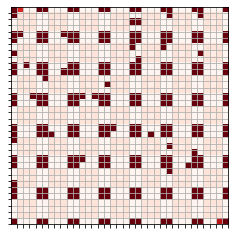

In [33]:
img_width, img_height = pcn.shape
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_height, img_width)
else:
    input_shape = (img_height,img_width, 1)
qpcn = Qpcn(pcn)
qpcn.get_list_centroid()
# canvas, reward, game_over = qpcn.act(DOWN)
# print("reward=", reward)
show(qpcn)

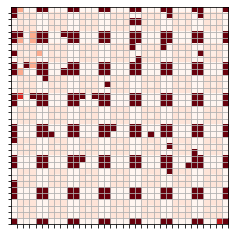

In [34]:
qpcn.act(LEFT1) 
#qpcn.act(RIGHT2)
qpcn.act(DOWN3)  # move down
qpcn.act(DOWN3)  # move right
qpcn.act(RIGHT2)  # move right
qpcn.act(DOWN3)  # move right
qpcn.act(UP1)  # move up
qpcn.act(DOWN3)  # move up
qpcn.act(DOWN1)  # move up
qpcn.act(DOWN1)  # move up
show(qpcn)

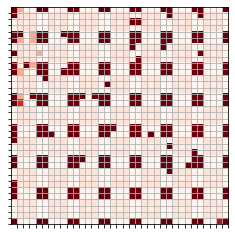

In [35]:
qpcn.act(DOWN1)  # move up
show(qpcn)

In [36]:
def dist(x1,y1,x2,y2):
        return ((x2-x1)**2 + (y2-y1)**2)**0.5

In [37]:
import tensorboardX

In [38]:
class ModifiedTensorBoard(TensorBoard):

    # Overriding init to set initial step and writer (we want one log file for all .fit() calls)
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.step = 1
        self.writer = tf.compat.v1.summary.FileWriter(self.log_dir)

    # Overriding this method to stop creating default log writer
    def set_model(self, model):
        pass

    # Overrided, saves logs with our step number
    # (otherwise every .fit() will start writing from 0th step)
    def on_epoch_end(self, epoch, logs=None):
        self.update_stats(**logs)

    # Overrided
    # We train for one batch only, no need to save anything at epoch end
    def on_batch_end(self, batch, logs=None):
        pass

    # Overrided, so won't close writer
    def on_train_end(self, _):
        pass

    # Custom method for saving own metrics
    # Creates writer, writes custom metrics and closes writer
    def update_stats(self, **stats):
        self._write_logs(stats, self.step)

    def _write_logs(self, logs, index):
        self.writer.reopen()
        for name, value in logs.items():
            if name in ['batch', 'size']:
                continue
            summary = tf.compat.v1.Summary()
            summary_value = summary.value.add()
            if isinstance(value, np.ndarray):
                summary_value.simple_value = value.item()
            else:
                summary_value.simple_value = value
            summary_value.tag = name
            self.writer.add_summary(summary, index)
        self.writer.flush()



In [39]:
TRAIN_ITEagentIONS = 50
MAX_EPISODE_LENGTH = 128
TRAJECtoRY_BUFFER_SIZE = 32
BATCH_SIZE = 16
RENDER_EVERY = 100
AGGREGATE_STATS_EVERY = 1

if __name__ == "__main__":
    os.chdir("D:/Study/RL/RLAChips-V11")
    img_height, img_width = pcn.shape
    env = Qpcn(pcn)
    EPISODES = 200000
    k_permutation = 100
    num_states = pcn.size
    state_dim = env.state_dim
    input_dim, output_dim = state_dim, num_actions
    lr, gamma, loss_clipping, c1, lamda = 1e-6, 0.92 , 0.2, 0.001, 0.95
    agent = Agent(input_dim, output_dim, lr, gamma, loss_clipping, c1,lamda,k_permutation)
    tensorboard = ModifiedTensorBoard(log_dir="logs/{}-{}".format(MODEL_NAME, int(time.time())))
    MODEL_NAME = "model"
    AGGREGATE_STATS_EVERY = 1
    ep_rewards=[]
    ep_loss = []
    ep_pw = []
    win_count = 0
    num_non_cell = 30
    supervision_factor = 0.3
    for e in range(1,EPISODES+1):
        agent_cell = random.choice(env.free_cells)
        non_available_cell = random.choices(env.free_cells,k=num_non_cell)
        target_cell = random.choice(env.free_target_cells)
        #target_cell = random.choice(env.free_cells)
        #target_cell = (34,33)
        state = env.reset(agent_cell,target_cell,non_available_cell)
#         for i in non_available_cell:
#             print(i,env._pcn[i[0]][i[1]+1])
#             time.sleep(2)
        r_sum = 0
        loss_sum =0 
        reward_sum = 0
        power_sum = 0
        done = False
        if e % 200==0:
            clear_output(wait=True)
        for cnt_step in range(MAX_EPISODE_LENGTH):
#             show(env)
#             time.sleep(0.5)
            clear_output(wait=True)
            #get action from agent given state
            #print(state)
            state = np.reshape(state,(-1,state_dim))
            action,pi_vec =  agent.act(state)
            ran_supervised = np.random.uniform(0,1)
            if ran_supervised < supervision_factor:
                env.supervised = 1
                action = env.valid_actions()[0]
                env.supervised = 0
            #get s_,r,done
            env.current_action = action
            next_state, reward, done= env.act(action)
            next_state = np.reshape(next_state,(-1,state_dim))
            if cnt_step%1==0:
                env.non_available_cell = random.choices(env.free_cells,k=num_non_cell)
            reward_sum += reward
            if done == 'not_over':
                done = False
            else :
                done = True
            mask = not done
            agent.remember(state, action,mask,pi_vec, reward)
            state = next_state
            if done == True :
                agent_cell = random.choice(env.free_cells)
                non_available_cell = random.choices(env.free_cells,k=num_non_cell)
                #target_cell = random.choice(env.free_target_cells)
                target_cell = random.choice(env.free_cells)
                #target_cell = (34,33)
                state = env.reset(agent_cell,target_cell,non_available_cell)
                loss_sum +=10*np.log10(3/4)
                ep_rewards.append(reward_sum)
                ep_loss.append(loss_sum)
                ep_pw.append(power_sum)
                loss_sum =0 
                reward_sum = 0
                power_sum = 0
            if reward==2 :
                loss = 0
                win_count+=1
            elif reward==0 :
                loss = 0
            elif reward == -1 :
                loss = 0
            elif reward == -1.5 :
                try :
                    loss = df["{}_to_{}".format(action_node_dict[env.old_action],action_node_dict[env.current_action])]
                except :
                    loss = 0
            else :
                loss = reward
            loss_sum+=loss*10
            try :
                power_sum += pc["{}_to_{}".format(action_node_dict[env.old_action],action_node_dict[env.current_action])]
            except :
                power_sum +=0
            env.old_action = action
            print("Episode : ",e, " Probability : ",pi_vec,"\n Action : ",action," Reward : ",reward," Loss : ",loss*10," Win count : ",win_count)
        agent.train_models()
        ep_rewards.append(reward_sum)
        ep_loss.append(loss_sum)
        ep_pw.append(power_sum)
        if  e%AGGREGATE_STATS_EVERY==0 or e == 1 :
            print("updating stats...")
            average_reward = sum(ep_rewards[-AGGREGATE_STATS_EVERY:]) / len(ep_rewards[-AGGREGATE_STATS_EVERY:])
            min_reward = min(ep_rewards[-AGGREGATE_STATS_EVERY:])
            max_reward = max(ep_rewards[-AGGREGATE_STATS_EVERY:])
            average_loss = sum(ep_loss[-AGGREGATE_STATS_EVERY:]) / len(ep_loss[-AGGREGATE_STATS_EVERY:])
            min_loss = min(ep_loss[-AGGREGATE_STATS_EVERY:])
            max_loss = max(ep_loss[-AGGREGATE_STATS_EVERY:])
            average_pwc = sum(ep_pw[-AGGREGATE_STATS_EVERY:]) / len(ep_pw[-AGGREGATE_STATS_EVERY:])
            min_pwc = min(ep_loss[-AGGREGATE_STATS_EVERY:])
            max_pwc = max(ep_loss[-AGGREGATE_STATS_EVERY:])
            #tensorboard.update_stats(tranmission_loss=loss_sum)
            tensorboard.step = e
            tensorboard.update_stats(reward_avg=average_reward, reward_min=min_reward,
                                           reward_max=max_reward,avarage_tranmission_loss = average_loss,
                                           avarage_power_consumption = average_pwc,min_tranmission_loss = min_loss,
                                           max_tranmission_loss = max_loss,min_power_consumption = min_pwc,
                                           max_power_consumption = max_pwc,
                                           epsilon=1)
            agent.save_model()

Episode :  17  Probability :  [0.05861283 0.07805347 0.0984518  0.05895809 0.10981678 0.09742014
 0.065192   0.09285127 0.10649988 0.0702467  0.10498815 0.05890892] 
 Action :  7  Reward :  -0.03364182671684155  Loss :  -0.3364182671684155  Win count :  35
Train on 128 samples
Epoch 1/16
128/128 [==============================] - 0s 179us/sample - loss: 0.8473
Epoch 2/16
 16/128 [==>...........................] - ETA: 0s - loss: 1.0855

KeyboardInterrupt: 

In [ ]:
result_ep_rewards = np.asarray(ep_rewards)
result_ep_loss = np.asarray(ep_loss)

In [ ]:
rsl = pd.DataFrame(result_ep_loss)
rsl.to_excel('rsl.xlsx', index=False, header=False)
rsr = pd.DataFrame(result_ep_rewards)
rsr.to_excel('rsr.xlsx', index=False, header=False)

In [ ]:
class ModifiedTensorBoard(TensorBoard):

    # Overriding init to set initial step and writer (we want one log file for all .fit() calls)
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.step = 1
        self.writer = tf.summary.create_file_writer(self.log_dir)

    # Overriding this method to stop creating default log writer
    def set_model(self, model):
        pass

    # Overrided, saves logs with our step number
    # (otherwise every .fit() will start writing from 0th step)
    def on_epoch_end(self, epoch, logs=None):
        self.update_stats(**logs)

    # Overrided
    # We train for one batch only, no need to save anything at epoch end
    def on_batch_end(self, batch, logs=None):
        pass

    # Overrided, so won't close writer
    def on_train_end(self, _):
        pass

    # Custom method for saving own metrics
    # Creates writer, writes custom metrics and closes writer
    def update_stats(self, **stats):
        self._write_logs(stats, self.step)

    def _write_logs(self, stats, index):
        #self.writer.reopen()
        with self.writer.as_default():
            tf.summary.scalar(name="reward_avg",data=stats["reward_avg"], step=self.step)
            tf.summary.scalar(name="reward_min",data=stats["reward_min"], step=self.step)
            tf.summary.scalar(name="reward_max",data=stats["reward_max"], step=self.step)
            tf.summary.scalar(name="avarage_tranmission_loss",data=stats["avarage_tranmission_loss"], step=self.step)
            tf.summary.scalar(name="avarage_power_consumption",data=stats["avarage_power_consumption"], step=self.step)
            tf.summary.scalar(name="epsilon",data=stats["reward_min"], step=self.step)
            self.writer.flush()



In [ ]:
class ModifiedTensorBoard(TensorBoard):

    # Overriding init to set initial step and writer (we want one log file for all .fit() calls)
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.step = 1
        #self.writer = tf.summary.FileWriter(self.log_dir)
        self.writer = tf.summary.create_file_writer(self.log_dir)
    # Overriding this method to stop creating default log writer
    def set_model(self, model):
        pass

    # Overrided, saves logs with our step number
    # (otherwise every .fit() will start writing from 0th step)
    def on_epoch_end(self, epoch, logs=None):
        self.update_stats(**logs)

    # Overrided
    # We train for one batch only, no need to save anything at epoch end
    def on_batch_end(self, batch, logs=None):
        pass

    # Overrided, so won't close writer
    def on_train_end(self, _):
        pass

    # Custom method for saving own metrics
    # Creates writer, writes custom metrics and closes writer
    def update_stats(self, **stats):
        #self._write_logs(stats, self.step)
        with self.writer.as_default():
            tf.summary.scalar(name="reward_avg",data=stats["reward_avg"], step=self.step)
            tf.summary.scalar(name="reward_min",data=stats["reward_min"], step=self.step)
            tf.summary.scalar(name="reward_max",data=stats["reward_max"], step=self.step)
            tf.summary.scalar(name="avarage_tranmission_loss",data=stats["avarage_tranmission_loss"], step=self.step)
            tf.summary.scalar(name="avarage_power_consumption",data=stats["avarage_power_consumption"], step=self.step)
            tf.summary.scalar(name="epsilon",data=stats["reward_min"], step=self.step)
            self.writer.flush()

    def _write_logs(self, logs, index):
        self.writer.reopen()
        for name, value in logs.items():
            if name in ['batch', 'size']:
                continue
            summary = tf.Summary()
            summary_value = summary.value.add()
            if isinstance(value, np.ndarray):
                summary_value.simple_value = value.item()
            else:
                summary_value.simple_value = value
            summary_value.tag = name
            #self.writer.add_summary(summary, index)
            with self.writer.as_default():
                tf.summary.scalar(name, summary, index)
                self.writer.flush()
        self.writer.flush()

In [ ]:
# pcn is a 2d Numpy array of floats between 0.0 to 1.0
# 1.0 corresponds to a free cell, and 0.0 an occupied cell
# agent = (row, col) initial agent position (defaults to (0,0))

class Qpcn(object):
    def __init__(self, pcn, agent=(0,1)):
        self._pcn = np.array(pcn)
        nrows, ncols = self._pcn.shape
        self.target = (nrows-1,ncols-2) # target cell where the "cheese" is
        self.free_cells = [(r,c) for r in range(nrows) for c in range(ncols) if self._pcn[r,c] == 1.0 ]
        self.free_target_cells = []
        for r in range(nrows):
            for c in range(ncols):
                if self._pcn[r,c] == 1.0 :
                    if r == 0 or r == nrows-1 or c == 0 or c == ncols-1:
                        self.free_target_cells.append((r,c))
#                     if r == nrows-1 :
#                         self.free_target_cells.append((r,c))
        self.free_cells.remove(self.target)
        self.current_distance = None
        self.available_cell_target = []
        self.centroid = []
        self.supervised = 0
        self.old_action = 1
        self.current_action = None
        self.num_non_available_cell = 0
        self.state_dim = self.num_non_available_cell*2+4
        if self._pcn[self.target] == 0.0:
            raise Exception("Invalid pcn: target cell cannot be blocked!")
        if not agent in self.free_cells:
            raise Exception("Invalid agent Location: must sit on a free cell")
        self.non_available_cell = random.choices(self.free_cells,k=self.num_non_available_cell)
        self.reset(agent,self.target,self.non_available_cell)
    def get_list_centroid(self):
      dx=[0,2,0,-2,   -2,-1,2,1,    -2,1,2,-1]
      dy=[2,0,-2,0,   -1,2,1,-2,    1,2,-1,-2]
      for i in range (self._pcn.shape[0]):
        for j in range (self._pcn.shape[1]):
          if (self._pcn[i][j]==0.95) :
            self.centroid.append((i,j))
            for temp in range(12):
              tx = i + dx[temp]
              ty = j + dy[temp]
              state_centroid_dict[(tx,ty)] = (i,j)
    def available_cell_for_agent(self):
        list_available_cell_agent = []
        nrows, ncols = self._pcn.shape
        for row in range(nrows) :
            for col in range(ncols) :
              if row == 1 or row == 2 or row == 3 or row ==6 or row == 7 or row ==8 or row == 11 or row == 12 or row == 13 :
                if col == 0 or col == 14 :
                      list_available_cell_agent.append((row,col))
              if col== 1 or col == 2 or col == 3 or col ==6 or col == 7 or col ==8 or col == 11 or col == 12 or col == 13 :
                if row == 0 or row == 14 :
                      list_available_cell_agent.append((row,col))
                if row == nrows-1 :
                      self.available_cell_target.append((row,col))
        return list_available_cell_agent
    
    def reset(self, agent,target,non_available_cell):
        self.agent = agent
        self._pcn = get_map()
        nrows, ncols = self._pcn.shape
        row, col = agent
        self._pcn[row, col] = agent_mark
        self.state = (row, col, 'valid')
        self.min_reward = -256
        self.total_reward = 0
        self.visited = set()
        self.target = target
        target_row,target_col = self.target
        self.old_distance = -999
        self.list_previous_state=[]
        self.non_available_cell = non_available_cell
        return self.observe().reshape(1,self.state_dim)
    
    def check_state_centroid(self):
        nrow, ncol, nmode = agent_row, agent_col, mode = self.state


    def update_state(self, action):
        nrows, ncols = self._pcn.shape
        nrow, ncol, nmode = agent_row, agent_col, mode = self.state
        if self._pcn[agent_row, agent_col] > 0:
            self.visited.add((agent_row, agent_col))  # mark visited cell

        valid_actions = self.valid_actions()
        x_centroid,y_centroid = state_centroid_dict[(nrow, ncol)]
        if not valid_actions:
            nmode = 'blocked'
        elif action in valid_actions:
            nmode = 'valid'
            dx=[0,2,0,-2,   -2,-1,2,1,    -2,1,2,-1]
            dy=[2,0,-2,0,   -1,2,1,-2,    1,2,-1,-2]
            #r2,d2,l2,u2,u1,r1,d3,l3,u3,r3,d1,l1
            #0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11
            if action == LEFT1:
              if self._pcn[nrow][ncol-1]== 1 and self._pcn[nrow][ncol+1]== 0.9:
                x_centroid +=dx[11]
                y_centroid +=(dy[11]-1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[11]
                y_centroid +=dy[11]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == LEFT2:
              if self._pcn[nrow][ncol-1]== 1 and self._pcn[nrow][ncol+1]== 0.9:
                x_centroid +=dx[2]
                y_centroid +=(dy[2]-1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[2]
                y_centroid +=dy[2]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == LEFT3:
              if self._pcn[nrow][ncol-1]== 1 and self._pcn[nrow][ncol+1]== 0.9:
                x_centroid +=dx[7]
                y_centroid +=(dy[7]-1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[7]
                y_centroid +=dy[7]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == RIGHT1:
              if self._pcn[nrow][ncol+1]== 1 and self._pcn[nrow][ncol-1]== 0.9:
                x_centroid +=dx[5]
                y_centroid +=(dy[5]+1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[5]
                y_centroid +=dy[5]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == RIGHT2:
              if self._pcn[nrow][ncol+1]== 1 and self._pcn[nrow][ncol-1]== 0.9:
                x_centroid +=dx[0]
                y_centroid +=(dy[0]+1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[0]
                y_centroid +=dy[0]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == RIGHT3:
              if self._pcn[nrow][ncol+1]== 1 and self._pcn[nrow][ncol-1]== 0.9:
                x_centroid +=dx[9]
                y_centroid +=(dy[9]+1)
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[9]
                y_centroid +=dy[9]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == DOWN1:
              if self._pcn[nrow+1][ncol]== 1 and self._pcn[nrow-1][ncol]== 0.9:
                x_centroid +=(dx[10]+1)
                y_centroid +=dy[10]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[10]
                y_centroid +=dy[10]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == DOWN2:
              if self._pcn[nrow+1][ncol]== 1 and self._pcn[nrow-1][ncol]== 0.9:
                x_centroid +=(dx[1]+1)
                y_centroid +=dy[1]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[1]
                y_centroid +=dy[1]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == DOWN3:
              if self._pcn[nrow+1][ncol]== 1 and self._pcn[nrow-1][ncol]== 0.9:
                x_centroid +=(dx[6]+1)
                y_centroid +=dy[6]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[6]
                y_centroid +=dy[6]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == UP1:
              if self._pcn[nrow-1][ncol]== 1 and self._pcn[nrow+1][ncol]== 0.9:
                x_centroid +=(dx[4]-1)
                y_centroid +=dy[4]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[4]
                y_centroid +=dy[4]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == UP2:
              if self._pcn[nrow-1][ncol]== 1 and self._pcn[nrow+1][ncol]== 0.9:
                x_centroid +=(dx[3]-1)
                y_centroid +=dy[3]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[3]
                y_centroid +=dy[3]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
            elif action == UP3:
              if self._pcn[nrow-1][ncol]== 1 and self._pcn[nrow+1][ncol]== 0.9:
                x_centroid +=(dx[8]-1)
                y_centroid +=dy[8]
                nmode = 'reward_unchanged'
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
              else :
                x_centroid +=dx[8]
                y_centroid +=dy[8]
                if self._pcn[x_centroid,y_centroid]==0.0 :
                    nmode = 'blocked'
                else :
                    self.state = (x_centroid,y_centroid, nmode)
        else:                  # invalid action, no change in agent position
            #nmode = 'invalid'
            pass

    def get_reward(self):
        agent_row, agent_col, mode = self.state
        target_row,target_col = self.target
        nrows, ncols = self._pcn.shape
        reward = None
        status = None
        if mode == 'reward_unchanged'and not (agent_row, agent_col) in self.visited:
          #mode = "valid"
          return 0
#         if self.current_action == self.old_action :
#           return -1.2
        if mode == 'blocked':
            reward  =self.min_reward - 0.5
        if (agent_row, agent_col) in self.visited:
            return -1.5
        if mode == 'invalid':
            reward  = -2
        # if mode == 'valid':
        #     reward  = -0.04
        if mode == 'valid':
            # self.current_distance = self.dist(agent_row,agent_col,target_row,target_col)
            # if self.current_distance <= self.old_distance :
            #       reward = -self.current_distance*0.004
                  
            # else : reward = -self.current_distance*0.005
            # self.old_distance = self.current_distance
            try : 
              reward = df["{}_to_{}".format(action_node_dict[self.old_action],action_node_dict[self.current_action])]
            except :
              reward = -1
        if agent_row == target_row and agent_col == target_col:
            status = 'win'
            return 2
        # if mode == 'valid' and status !='win':
        #       self.current_distance = self.dist(agent_row,agent_col,target_row,target_col)
        #       if (agent_row, agent_col) in self.visited :
        #           reward = -0.25
        #       elif self.current_distance >= self.old_distance :
        #       #reward = -current_distance*0.001
        #           reward = -0.1             
        #       else : reward = -0.04
        #       self.old_distance = self.current_distance
        return reward
    def dist(self,x1,y1,x2,y2):
        return ((x2-x1)**2 + (y2-y1)**2)**0.5
    def act(self, action):
        self.update_state(action)
        reward = self.get_reward()
        self.total_reward += reward
        status = self.game_status()
        envstate = self.observe()
        return envstate, reward, status
    def act_to_predict(self, action):
        self.update_state_to_predict(action)
        status = self.game_status_to_predict()
        envstate = self.observe()
        return envstate, status

    def observe(self):
        canvas = self.draw_env(self.non_available_cell)
        envstate = np.reshape(canvas,newshape=(1,self.state_dim))
        return envstate

    def draw_env(self, non_available_cell):
        self._pcn = get_map()
        row, col = self.agent
        self._pcn[row, col] = agent_mark
        canvas = np.copy(self._pcn)
        nrows, ncols = self._pcn.shape
        # clear all visual marks
        for r in range(nrows):
            for c in range(ncols):
                if canvas[r,c] > 0.0:
                    canvas[r,c] = 1.0
                if (r,c) in  non_available_cell:
                    canvas[r,c] = 0.0
                    self._pcn[r,c]= 0.0
        # draw the agent
        for row,col in self.visited:
            canvas[row,col] = 0.6
        row, col, valid = self.state
        row_target,col_target =  self.target
        canvas[row, col] = agent_mark
        canvas[row_target,col_target] = target_mark
        #canvas = noisy("gauss",canvas)
        input_state = [row,col,row_target,col_target]
        for item in non_available_cell:
            input_state.append(item[0])
            input_state.append(item[1])
        input_state = np.asarray(input_state).reshape(-1, 1)
        std_scale = preprocessing.StandardScaler().fit(input_state)
        input_state = std_scale.transform(input_state)
        return input_state

    def game_status(self):
        if self.total_reward < self.min_reward:
            return 'lose'
        agent_row, agent_col, mode = self.state
        nrows, ncols = self._pcn.shape
        target_row,target_col = self.target
        if agent_row == target_row and agent_col == target_col:
            return 'win'

        return 'not_over'
    def set_supervised(self,supervised):
        self.supervised = supervised 
    def game_status_to_predict(self):
        agent_row, agent_col, mode = self.state
        target_row,target_col = self.target
        if agent_row == target_row and agent_col == target_col:
            return 'win'

        return 'not_over'

    def valid_actions(self, cell=None):
        if cell is None:
            row, col, mode = self.state
        else:
            row, col = cell
        actions = [LEFT1, LEFT2, LEFT3, RIGHT1, RIGHT2, RIGHT3, UP1, UP2, UP3, DOWN1, DOWN2, DOWN3]
        nrows, ncols = self._pcn.shape
        if row == 0:
            actions.remove(UP1)
            actions.remove(UP2)
            actions.remove(UP3)
        elif row == nrows-1:
            actions.remove(DOWN1)
            actions.remove(DOWN2)
            actions.remove(DOWN3)
        if col == 0:
            actions.remove(LEFT1)
            actions.remove(LEFT2)
            actions.remove(LEFT3)
        elif col == ncols-1:
            actions.remove(RIGHT1)
            actions.remove(RIGHT2)
            actions.remove(RIGHT3)
        # if row>0 and self.pcn[row-1,col] == 0.0:
        #     actions.remove(UP1)
        #     actions.remove(UP2)
        #     actions.remove(UP3)
        #     actions.remove(UP4)
        # if row<nrows-1 and self.pcn[row+1,col] == 0.0:
        #     actions.remove(DOWN1)
        #     actions.remove(DOWN2)
        #     actions.remove(DOWN3)
        #     actions.remove(DOWN4)
        # if col>0 and self.pcn[row,col-1] == 0.0:
        #     actions.remove(LEFT1)
        #     actions.remove(LEFT2)
        #     actions.remove(LEFT3)
        #     actions.remove(LEFT4)
        # if col<ncols-1 and self.pcn[row,col+1] == 0.0:
        #     actions.remove(RIGHT1)
        #     actions.remove(RIGHT2)
        #     actions.remove(RIGHT3)
        #     actions.remove(RIGHT4)
        dx=[0,2,0,-2,   -2,-1,2,1,    -2,1,2,-1]
        dy=[2,0,-2,0,   -1,2,1,-2,    1,2,-1,-2]
        #r2,d2,l2,u2,u1,r1,d3,l3,u3,r3,d1,l1
        #0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11
        tx_target,ty_target = self.target
        if self.supervised == 1:
            best_choice = None
            best_distance = 999999
            for action in actions :
                x_centroid,y_centroid = state_centroid_dict[(row, col)]
                if action == LEFT1:
                    if self._pcn[row][col-1]== 1 and self._pcn[row][col+1]== 0.9:
                        x_centroid +=dx[11]
                        y_centroid +=(dy[11]-1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[11]
                        y_centroid +=dy[11]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == LEFT2:
                    if self._pcn[row][col-1]== 1 and self._pcn[row][col+1]== 0.9:
                        x_centroid +=dx[2]
                        y_centroid +=(dy[2]-1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target) 
                    else :
                        x_centroid +=dx[2]
                        y_centroid +=dy[2]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == LEFT3:
                    if self._pcn[row][col-1]== 1 and self._pcn[row][col+1]== 0.9:
                        x_centroid +=dx[7]
                        y_centroid +=(dy[7]-1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[7]
                        y_centroid +=dy[7]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == RIGHT1:
                    if self._pcn[row][col+1]== 1 and self._pcn[row][col-1]== 0.9:
                        x_centroid +=dx[5]
                        y_centroid +=(dy[5]+1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[5]
                        y_centroid +=dy[5]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == RIGHT2:
                    if self._pcn[row][col+1]== 1 and self._pcn[row][col-1]== 0.9:
                        x_centroid +=dx[0]
                        y_centroid +=(dy[0]+1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[0]
                        y_centroid +=dy[0]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == RIGHT3:
                    if self._pcn[row][col+1]== 1 and self._pcn[row][col-1]== 0.9:
                        x_centroid +=dx[9]
                        y_centroid +=(dy[9]+1)
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[9]
                        y_centroid +=dy[9]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == DOWN1:
                    if self._pcn[row+1][col]== 1 and self._pcn[row-1][col]== 0.9:
                        x_centroid +=(dx[10]+1)
                        y_centroid +=dy[10]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[10]
                        y_centroid +=dy[10]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == DOWN2:
                    if self._pcn[row+1][col]== 1 and self._pcn[row-1][col]== 0.9:
                        x_centroid +=(dx[1]+1)
                        y_centroid +=dy[1]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[1]
                        y_centroid +=dy[1]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == DOWN3:
                    if self._pcn[row+1][col]== 1 and self._pcn[row-1][col]== 0.9:
                        x_centroid +=(dx[6]+1)
                        y_centroid +=dy[6]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[6]
                        y_centroid +=dy[6]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == UP1:
                    if self._pcn[row-1][col]== 1 and self._pcn[row+1][col]== 0.9:
                        x_centroid +=(dx[4]-1)
                        y_centroid +=dy[4]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[4]
                        y_centroid +=dy[4]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == UP2:
                    if self._pcn[row-1][col]== 1 and self._pcn[row+1][col]== 0.9:
                        x_centroid +=(dx[3]-1)
                        y_centroid +=dy[3]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[3]
                        y_centroid +=dy[3]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                elif action == UP3:
                    if self._pcn[row-1][col]== 1 and self._pcn[row+1][col]== 0.9:
                        x_centroid +=(dx[8]-1)
                        y_centroid +=dy[8]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    else :
                        x_centroid +=dx[8]
                        y_centroid +=dy[8]
                        cur_distance = self.dist(x_centroid,y_centroid,tx_target,ty_target)
                    if self._pcn[x_centroid][y_centroid]==0:
                        cur_distance = 9999
                if (cur_distance<best_distance):
                    best_distance = cur_distance
                    best_choice = action
                #print("Best distance : ",best_distance, " Best choice : ",best_choice)
            actions.clear()
            actions.append(best_choice)
        return actions
    def check_valid_with_previous_state(self,cell):
        row_cell, col_cell = cell
        for temp in self.visited:
            row, col = temp
            if row_cell == row and col_cell == col :
                return False
        return True